# scikit-learn presentation
scikit-learn is a machine learning library for the Python. First public release was published in 2010. It is designed to be used with Numpy, Scipy, Matplotlib. It has a **wide range of features** :
* Regression
* Classification
* Clustering
* Dimensionality reduction
* Preprocessing

And a **very rich documentation** (Examples, Algorithm discussions, ...  more than 2000 pages) :
* [A user guide](https://scikit-learn.org/stable/user_guide.html)
* [Several tutorials](https://scikit-learn.org/stable/tutorial/index.html)
* [A reference guide](https://scikit-learn.org/stable/modules/classes.html)


<p style="font-size:10px"> Copyright (C) 2017-2020 Serge Cohen, Bertrand Monfort, Frédéric-Emmanuel Picca under <a href="#GFDL"> GFDL</a></p>

# 1. Steps of data processing
scikit-learn functions exist for each step
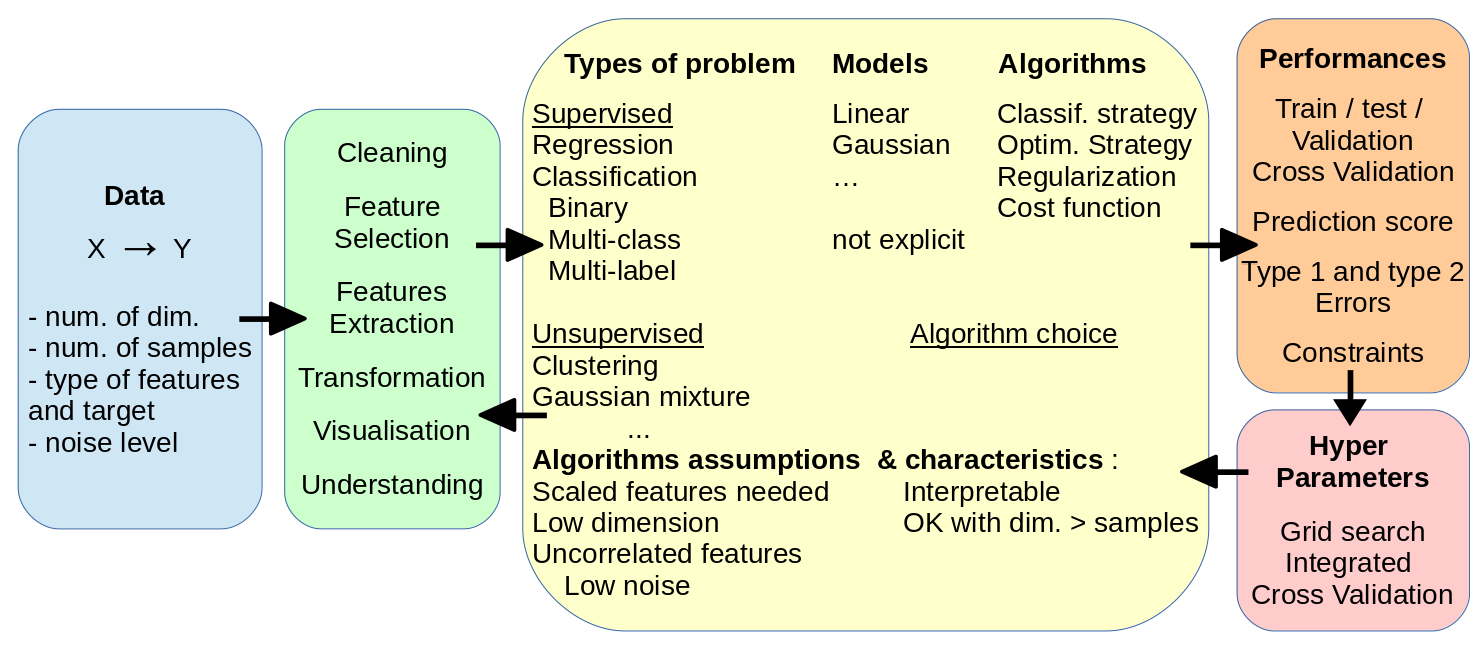

## Importance of the whole picture
It may be tempting to focus only on the algorithms and the performances, but the whole picture is important,  : 
 * the exploratary and pre-processing part
     * cleaning, testing consistency
     * understanding the data, their type, in order to guide the selection choice
     * is pre-processing changing the data structure ? Is it a problem ?
     * ...
 * Algorithm :
     * BEWARE of the algorithm assumptions
     * Meanings of hyper-parameters
     * What is the undelying model ?
     * Be careful of overfitting
     * ...
 


# 2. Elements of scikit-learn library content and syntax

## 2.1 Several sub-modules, some important samples (out of 37) :

 * <span style="color: #FF9700">sklearn.cluster: **Clustering** </span>
 * <span style="color: #0e64b5"> sklearn.datasets: **Datasets** </span>
 * <span style="color: #FF9700">sklearn.discriminant_analysis: **Discriminant Analysis**</span>
 * <span style="color: #FF9700">sklearn.gaussian_process: **Gaussian Processes**</span>
 * <span style="color: #FF9700">sklearn.linear_model: **Generalized Linear Models**</span>
 * <span style="color: #FF5700">sklearn.metrics: **Metrics**</span>
 * <span style="color: #FF0000">sklearn.model_selection : **Hyper-parameters selection**</span>
 * <span style="color: #FF9700">sklearn.multiclass: **Multiclass and multilabel classification**</span>
 * <span style="color: #FF9700">sklearn.naive_bayes: **Naive Bayes**</span>
 * <span style="color: #FF9700">sklearn.neighbors: **Nearest Neighbors**</span>
 * <span style="color: #FF9700">sklearn.neural_network: **Neural network models**</span>
 * <span style="color: #008800">sklearn.pipeline: **Pipeline**</span>
 * <span style="color: #008800">sklearn.preprocessing: **Preprocessing and Normalization**</span>
 * <span style="color: #FF9700">sklearn.svm: **Support Vector Machines**</span>
 * <span style="color: #FF9700">sklearn.tree: **Decision Trees**</span>

## 2.2 Key classes and methods
 * an <span style="color: #0e64b5">**estimator**</span> class, which implements algorithms called with methods like <span style="color: #008800">fit</span> and <span style="color: #008800">predict</span>
     * **regressor**, *example* : sklearn.linear_model.LinearRegression
         * <span style="color: #008800">fit</span>
         * <span style="color: #008800">predict</span>
         * <span style="color: #008800">score</span>
         * and may implements <span style="color: #008800">decision_function</span>, <span style="color: #008800">predict_proba</span>

     * **classifier**, *example* : sklearn.neighbors.KNeighborsClassifier
     * **clusterer**, *example* : sklearn.cluster.KMeans
         * <span style="color: #008800">fit</span>
         * <span style="color: #008800">predict</span> or <span style="color: #008800">fit_predict</span>
 * a **pipe-lining system**
     * <span style="color: #0e64b5">**Pipeline**</span> class : sklearn.pipeline.Pipeline
     * it uses "transformers" : classes with a <span style="color: #008800">transform</span> or <span style="color: #008800">fit_transform</span> method
     
To know more [READ HERE](https://scikit-learn.org/stable/glossary.html#class-apis-and-estimator-types)

## Exercise 1
What is your scikit-learn version ?

In [ ]:
### ANSWERS ###
import sklearn
print("scikit-learn VERSION",sklearn.__version__)


### A two + three lines classification code example

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression()
clf.fit(X,y).score(X,y)


## Exercise 2 
* Use the pipelining system to create an classifier that use LogisticRegression after having standardize all the features  by removing the mean and scaling to unit variance
* use it on the iris dataset



# WARNING : easy to use ... means tricky

scikit-learn gives :
* a easy way to run complex algorithms | _Drawback_ : misuse or misunderstanding of them 
* a standard way to call an algorithm &nbsp;&nbsp;&nbsp;&nbsp;  | _Drawback_ : not knowing which algorithm is used

# 3. Regression

With the **Scipy** module we already have worked on regressions, with ad hoc algortihms and **least squares algorithm** for the : 
* estimation of a trend 
* estimation of a sinusoidal function

scikit-learn provides many other algorithms




## Exercise 3
We test the impact of algorithm parameters on the fitting of a function with noise.
We test three algorithms :
* A linear regression preceded by a polynmial fit
* A Ridge regression also preceded by a polynmial fit
* A Gaussian Process Regressor

**Hints**  : 
* choose a different type of parameter to increment for each algorithm
* parameters can be difficult to find for Gaussian Process Regressor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as CK

from sklearn.linear_model import Ridge

def cos_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

#### Parameters changing with iteration ####
n_samples = 30
degrees = []                            ##### COMPLETE HERE
param_GPR = []                          ##### COMPLETE HERE
param_Ridge = []                        ##### COMPLETE HERE

regress_name = "Poly-Ridge"

if regress_name == 'GPR':
    param_name = ""
    param = param_GPR
elif regress_name == "Poly-LR" :
    param_name = "degree"
    param = degrees
elif regress_name == "Poly-Ridge" :
    param_name = ""
    param = param_Ridge

#### DATA ####
X = np.sort(np.random.rand(n_samples))
y = cos_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(param)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    #### ALGORITHMS ####
    if regress_name == 'GPR':
        regress=
                                             ##### COMPLETE HERE
    
    elif regress_name == "Poly-LR" :
                                             ##### COMPLETE HERE


        
    elif regress_name == "Poly-Ridge" :
                                             ##### COMPLETE HERE

            
            
    #### RUN ALGORITHM ####
    regress                                  ##### COMPLETE HERE


    # Evaluate models with crossvalidation
    scores =                                 ##### COMPLETE HERE

    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, regress.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, cos_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(regress_name+ " ("+ param_name+ ": "+str(param[i])+")")
    plt.title("{} ({})\nCV mse = {:.1e}(+/- {:.1e})".format(regress_name,
        param[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
%matplotlib inline
########### ANSWERS PART 1 ###########
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as CK

from sklearn.linear_model import Ridge

def cos_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

#### Parameters changing with iteration ####
n_samples = 30
degrees = [1, 4, 12, 15]
alpha_GPR = [2, 2e-1, 2e-2, 2e-3]
alpha_Ridge = [1, 1e-3, 1e-6, 1e-12]
regress_name = "GPR"                   ###### <--- HERE CHOOSE THE ALGORITHM 
if regress_name == 'GPR':
    param_name = "alpha"
    param = alpha_GPR
elif regress_name == "Poly-LR" :
    param_name = "degree"
    param = degrees
elif regress_name == "Poly-Ridge" :
    param_name = "alpha"
    param = alpha_Ridge
#### DATA ####
X = np.sort(np.random.rand(n_samples))
y = cos_fun(X) + np.random.randn(n_samples) * 0.1

In [ ]:
########### ANSWERS PART 2 ###########
plt.figure(figsize=(14, 5))
for i in range(len(param)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    #### ALGORITHMS ####
    if regress_name == 'GPR':
        kernel = CK(1, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
        regress = GaussianProcessRegressor(kernel=kernel,alpha=param[i])
    elif regress_name == "Poly-LR" :
        polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
        linear_regression = LinearRegression()
        regress = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    elif regress_name == "Poly-Ridge" :
        polynomial_features = PolynomialFeatures(degree=30,
                                             include_bias=False)
        linear_regression = Ridge(alpha=param[i])
        regress = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
        
    #### RUN ALGORITHM ####
    regress.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(regress, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, regress.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, cos_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(regress_name+ " ("+ param_name+ ": "+str(param[i])+")")
    plt.title("{} ({})\nCV mse = {:.1e}(+/- {:.1e})".format(regress_name,
        param[i], -scores.mean(), scores.std()))
plt.show()

# 4. Classification 


# 4.1 Different classification problem 
Some classifier adresses only a two classes classification problem.
More generally, classification problems are :
 * Classification (two classes)
 * Multi-class (more than two classes)
 * Multi-labels (each element can have zero, one or more labels)
 * Multi-output multi-class 

There are srategies to extend algorithms to the multi-class problem :
 * One versus All (One vesus the rest)
 * One against One


# 4.2 Classification algorithms in scikit-learn 


| Algorithm |Inherently multiclass |One-Vs-All| One-Vs-One |Supports multilabel |Supports multiclass-multioutput|
| ---------------------- | :---------: | :----------: | :---------: | :--------: | :-----------: |
|sklearn.discriminant_analysis.LinearDiscriminantAnalysis    | X |  -   |   -   |  -    |  -    |
|sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis | X | -  | -  | -  | -  |
|sklearn.ensemble.ExtraTreesClassifier                       | X | -  | -  | X | X |
|sklearn.ensemble.GradientBoostingClassifier                 | -  | X | -  | -  | -  |
|sklearn.ensemble.RandomForestClassifier                     | X | -  | -  | X | X |
|sklearn.gaussian_process.GaussianProcessClassifier          | -  | X (option) | X (option) | - | - |
|sklearn.linear_model.LogisticRegression                     | X  (option)| X (option) | - | - | - |
|sklearn.linear_model.PassiveAggressiveClassifier            | -  |X | - | - | - |
|sklearn.linear_model.Perceptron                             | -  |X | - | - | - |
|sklearn.linear_model.RidgeClassifier                        | X | - | - | - | - |
|sklearn.linear_model.SGDClassifier                          | - | X | - | - | - |
|sklearn.naive_bayes.BernoulliNB                             | X | - | - | - | - |
|sklearn.naive_bayes.GaussianNB                              | X | - | - | - | - |
|sklearn.neighbors.KNeighborsClassifier                      | X | - | - | X | X |
|sklearn.neighbors.NearestCentroid                           | X | - | - | - | - |
|sklearn.neighbors.RadiusNeighborsClassifier                 | X | - | - | X | X |
|sklearn.neural_network.MLPClassifier                        | X | - | - | X | - |
|sklearn.semi_supervised.LabelPropagation                    | X | - | - | - | - |
|sklearn.semi_supervised.LabelSpreading                      | X | - | - | - | - |
|sklearn.svm.LinearSVC                                       | X (option) | X (option) | - | - | - |
|sklearn.svm.NuSVC                                           | - | - | X | - | - |
|sklearn.svm.SVC                                             | - | - | X | - | - | 
|sklearn.tree.DecisionTreeClassifier                         | X | - | - | X | X |
|sklearn.tree.ExtraTreeClassifier                            | X | - | - | X | X |


# Logistic Regression
Logistic regression, despite its name, is often used for **classification**.

The simple model is for **two classes** ($Y_i = 0$ or $Y_i = 1$)

$$
\mathbb{P}[Y_i=1 \mid \mathbf{X}_i] = p_i = \frac{1}{1+e^{-\boldsymbol\beta \cdot \mathbf{X}_i}} = 
1 / \left(1 + \exp \left( - \sum \beta_i \mathbf{X}_i \right) \right)
$$

where $\beta$ is the vector of parameters we want to evaluate.

We can see there is a direct link between parameters and probability of chossing a class, given the $\mathbf{X}_i$ observations


## WARNING 
Vocabulary in stastics is a difficulty, it changes depending on presentations. For exampe, Logsitic regression is sometimes called logit regression, ...

More generally, for deterministic value, variable, estimator, ... sometimes the same notation is used.


## Extension : Multinomial Logistic Regression
The model can be extended to **K classes**
In this case, it can be seen as a set of (K-1) independent binary regressions

## Example
We can try to classify the Iris dataset we all ready have seen

In [ ]:
%matplotlib inline
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


data = load_iris()
X = data.data
y = data.target
clf = LogisticRegression()

clf.fit(X,y)

y_est = clf.predict(X)

print("Number of samples : ",len(y))
print("Classification score:", clf.score(X, y))

In [ ]:
#### GRAPHICS
ind1=2
ind2=ind1+1

plt.figure(figsize=[10,7])
for c in np.unique(y_est) :
    plt.scatter(X[y_est==c, ind1], X[y_est==c, ind2], label=data.target_names[c], alpha=1)
plt.scatter(X[y_est!=y, ind1], X[y_est!=y, ind2], label="ERRORS", alpha=1)

plt.title('Two dimension graph with estimated classes')
plt.legend()
plt.xlabel(data.feature_names[ind1])
plt.ylabel(data.feature_names[ind2])
plt.show()

## Exercise 4
Change the variable default_param in the code below
* What happens ?
* Why ?

In [ ]:
%matplotlib inline
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

data = load_iris()
X = data.data
y = data.target
clf = LogisticRegression()

default_param = False
if default_param :
    clf = LogisticRegression()
else :
    clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

clf.fit(X,y)

#print("SOLVER : ",clf.solver)

y_est = clf.predict(X)

print("Classification score:", clf.score(X, y))


## One more WARNING
As said before, scikit-learn focuses on the user friendly syntax, this may hide what is the algorithm which is really used 

## Exercise 5
 * try to select only 1 feature column of X to compute LogisticRegression
 * which is the best ?

## Exercise 6
 * load data from Admissions_University.csv, whose 4 columns are *Student ID, sex(Male= 1,Female = 2), department, admitted (yes = 1, no = 0)*
 * use LogisticRegression to evaluate probability of admission by sex (BEWARE not all columns are significant)

## Important question 
 ... following of exercise 6

Is there sex bias in graduate admissions ?

## More questions
 ... following of exercise 6
 
* What is the probability in being admitted in department 4 which is evaluated by LogissticRegression ?
* What is the experimental frequence of admission in department 4 ?
* Why is it so different ?
* Correct the problem in the code 

## Conclusions about the use of LogisticRegression
* quite a rigid model
* multiple ways to manage multi-class
* different treatment if a feature is numerical or not

## Conclusions in real life
* data are created from a real case, [the graduate school admissions to University of California, Berkeley](https://en.wikipedia.org/wiki/Simpson%27s_paradox#UC_Berkeley_gender_bias),  with the real frequences of adminission
* Here is [a more precise analysis](https://homepage.stat.uiowa.edu/~mbognar/1030/Bickel-Berkeley.pdf)

## Conclusion about data interpretation : the Simpson's paradox
Taking a new feature into account can change the sign of the trend for the first feature !

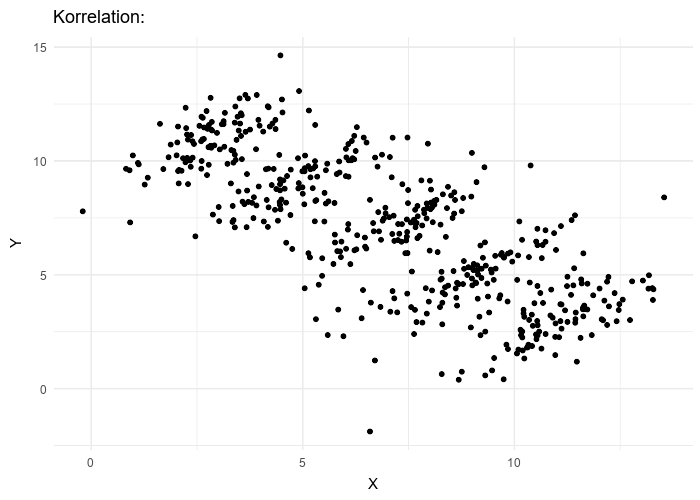
Copyright 2017 Pace~svwiki  Creative Commons Attribution-Share Alike 4.0 International license. ([CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.en))

We can imagine a case : on x the grades of high school diploma, on y the grades at first year in college. The explanation could be that students who have better grades choose more demanding colleges
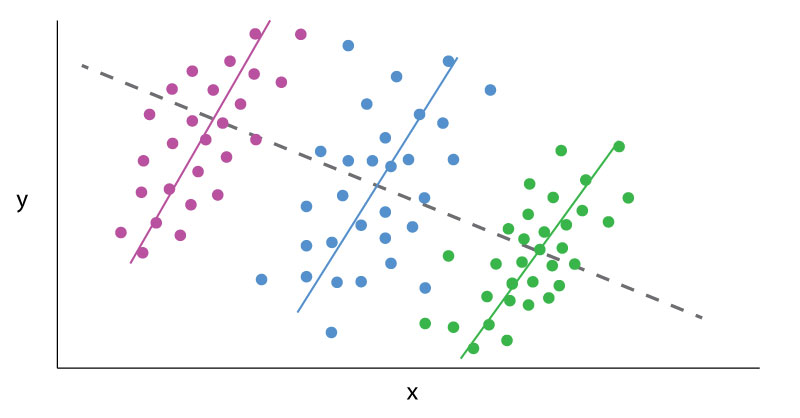

Copyright (C)  2017-2020  Serge Cohen, Bertrand Monfort, Frédéric-Emmanuel Picca under GDFL <a class="anchor" id="GFDL"></a>

Permission is granted to copy, distribute and/or modify this document under the terms of the GNU Free Documentation License, Version 1.3 or any later version published by the Free Software Foundation;   
with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.

A copy of the license is included in the section entitled "[GNU Free Documentation License](https://www.gnu.org/licenses/fdl-1.3-standalone.html)".